In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


In [21]:
orders = pd.read_csv("orders.csv.zip", sep="|")

In [22]:
orders['time'] = pd.to_datetime(orders['time'])
orders['week'] = pd.DatetimeIndex(orders['time']).to_period('W')
orders['day_of_week'] = orders['time'].dt.day_of_week
orders['week_of_month'] = (orders['time'].dt.day - 1) // 7 + 1
orders['orderValue'] = orders['order'] * orders['salesPrice']

In [23]:
orders['itemID'].value_counts()

itemID
5035    8973
5117    8063
7789    7415
5122    6442
5139    5407
        ... 
5394       1
7530       1
6432       1
8645       1
7176       1
Name: count, Length: 9840, dtype: int64

In [24]:
orders

,time,transactID,itemID,order,salesPrice,week,day_of_week,week_of_month,orderValue
0,2018-01-01 00:01:56,2278968,450,1,17.42,2018-01-01/2018-01-07,0,1,17.42
1,2018-01-01 00:01:56,2278968,83,1,5.19,2018-01-01/2018-01-07,0,1,5.19
2,2018-01-01 00:07:11,2255797,7851,2,20.47,2018-01-01/2018-01-07,0,1,40.94
3,2018-01-01 00:09:24,2278968,450,1,17.42,2018-01-01/2018-01-07,0,1,17.42
4,2018-01-01 00:09:24,2278968,83,1,5.19,2018-01-01/2018-01-07,0,1,5.19
...,...,...,...,...,...,...,...,...,...
2181950,2018-06-29 23:54:22,2040347,9217,1,23.50,2018-06-25/2018-07-01,4,5,23.50
2181951,2018-06-29 23:55:09,2260943,2175,1,11.60,2018-06-25/2018-07-01,4,5,11.60
2181952,2018-06-29 23:55:09,2260943,2061,1,1.03,2018-06-25/2018-07-01,4,5,1.03
2181953,2018-06-29 23:55:09,2260943,2195,1,18.73,2018-06-25/2018-07-01,4,5,18.73


In [30]:
total_orders = orders.groupby([orders['week'], orders['itemID']])['order'].sum().unstack(1).fillna(0)
total_values = orders.groupby([orders['week'], orders['itemID']])['orderValue'].sum().unstack(1).fillna(0)

In [32]:
total_values

itemID,1,2,3,4,5,6,7,8,9,10,...,10440,10441,10442,10443,10449,10450,10459,10460,10462,10463
week,,,,,,,,,,,,,,,,,,,,,
2018-01-01/2018-01-07,0.00,0.00,0.00,0.00,15.68,0.00,0.00,0.00,199.84,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2018-01-08/2018-01-14,0.00,0.00,14.04,0.00,0.00,0.00,0.00,0.00,199.84,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2018-01-15/2018-01-21,0.00,0.00,899.99,13.01,7.84,0.00,0.00,10.66,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2018-01-22/2018-01-28,6.22,0.00,56.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2018-01-29/2018-02-04,973.43,0.00,0.00,0.00,0.00,0.00,34.39,0.00,199.84,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2018-02-05/2018-02-11,3.11,0.00,1263.60,0.00,0.00,0.00,0.00,0.00,199.84,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2018-02-12/2018-02-18,6.22,0.00,0.00,0.00,7.84,17.25,0.00,5.33,0.00,25.69,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2018-02-19/2018-02-25,102.63,9.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9192.46,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00
2018-02-26/2018-03-04,3.11,9.15,14.04,13.01,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00


In [33]:
X = total_values.values.T
cosine_sim_matrix = cosine_similarity(X)

In [62]:
from sklearn.cluster import SpectralClustering

n_clusters = 100

clustering = SpectralClustering(
    n_clusters=n_clusters,
    affinity='precomputed'
)

labels = clustering.fit_predict(cosine_sim_matrix)

In [76]:
np.unique(labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
       dtype=int32),
 array([372, 536, 401, 340, 501, 130, 422, 102,  95,  39, 530, 494, 324,
        137, 396, 780, 264,   1, 376, 549, 355,   1, 153, 144, 457,   1,
          1, 404,   1, 378,   1,  73,   1, 381,   1,   1,   1,   1,   1,
          1,  88,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1, 429,   1,   1,   1,   1,   1,   1,   1, 120,   1,   1,
          1,   1,  

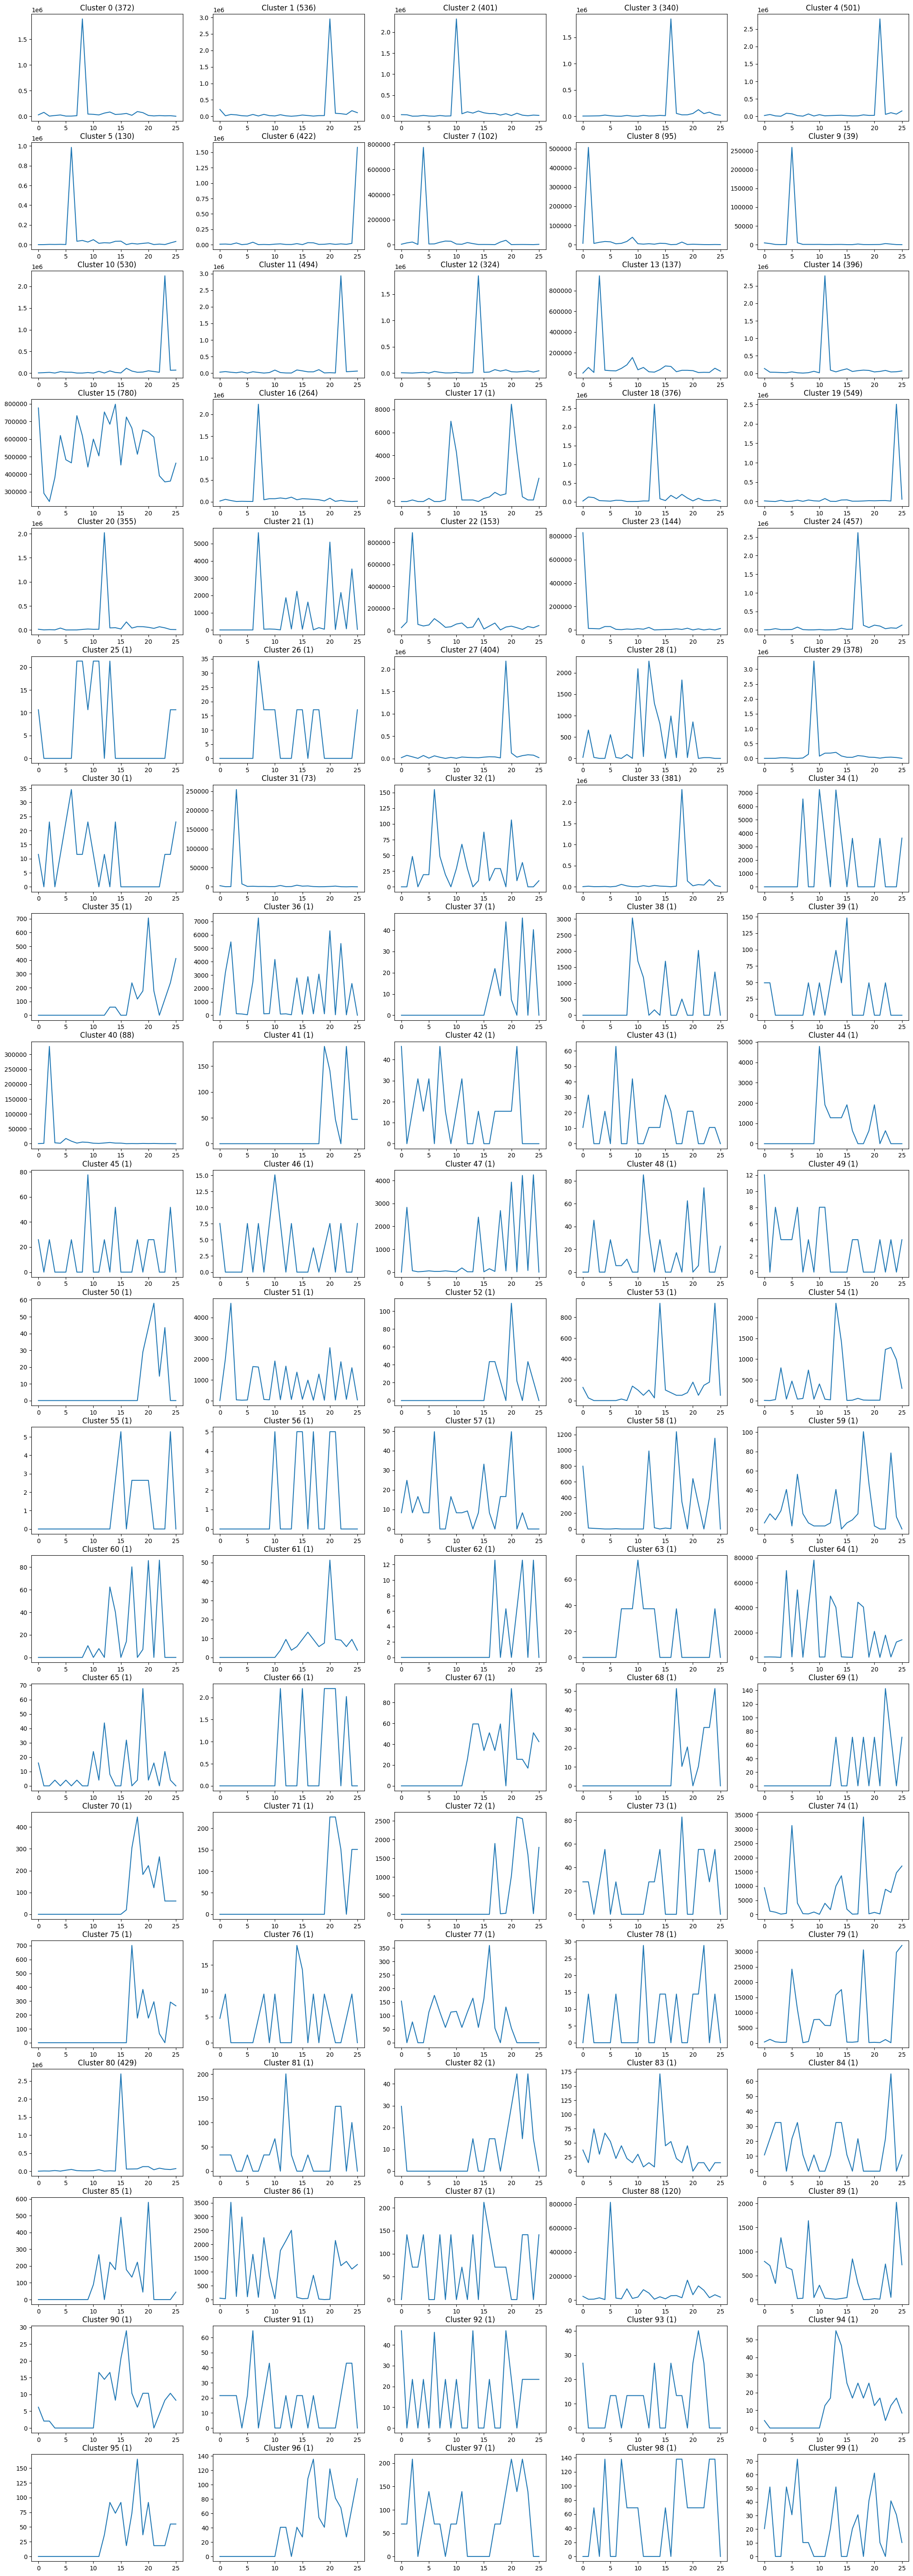

In [80]:
_, axs = plt.subplots(20, 5, figsize=(26,76))
axs = axs.flatten()
for i, (l, ax) in enumerate(zip(np.unique(labels), axs)):
    mask = labels == l
    ax.plot(total_values.loc[:, mask].sum(axis=1).values)
    ax.set_title(f"Cluster {l} ({mask.sum()})")

In [34]:
for k, df in orders.groupby(by='itemID'):
    s1 = df['orderValue'].sum()
    s2 = total_values[k].sum()
    if np.isclose(s1, s2, rtol=1e-9):
        continue
    raise Exception(f"Uneven sums for {k}: {s1} != {s2}")

In [35]:
stuff = pd.DataFrame({
    'total value': total_values.sum(),
    'N. days had sales': (total_values != 0).sum()
})
stuff['average value sell day'] = stuff['total value'] / stuff['N. days had sales']
stuff.corr()

,total value,N. days had sales,average value sell day
total value,1.000000,0.287345,0.621639
N. days had sales,0.287345,1.000000,-0.123779
average value sell day,0.621639,-0.123779,1.000000


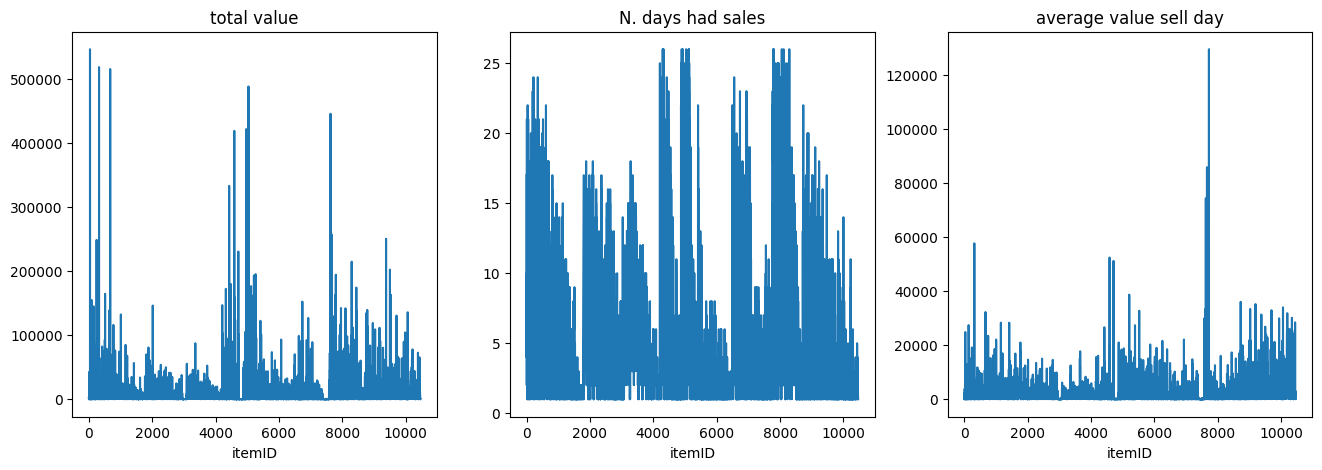

In [36]:
_, axs = plt.subplots(1, 3, figsize=(16, 5))
for a, c in zip(axs, stuff.columns):
    stuff[c].plot(ax=a, title=c) 

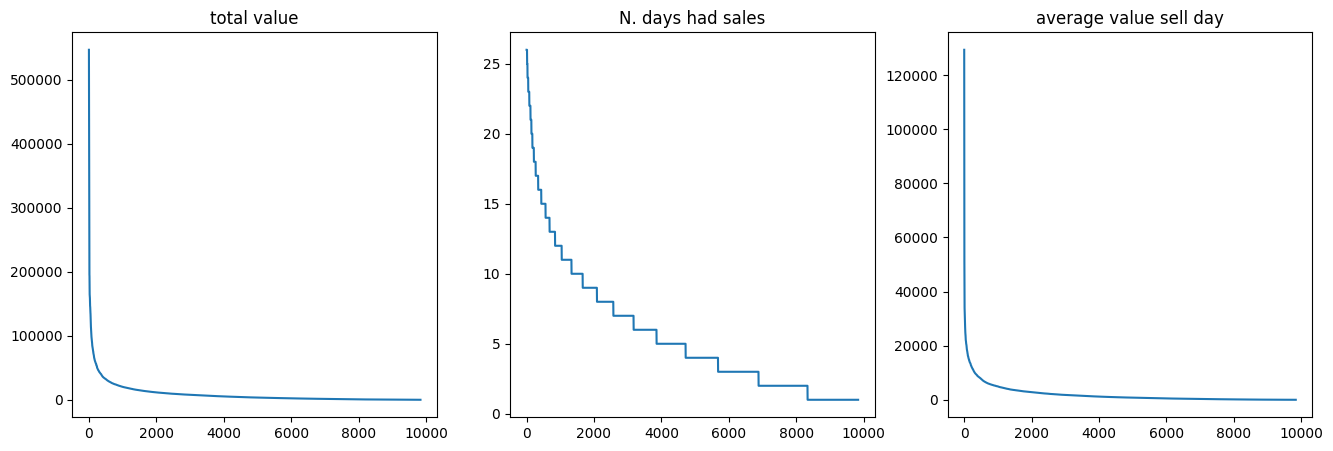

In [37]:
_, axs = plt.subplots(1, 3, figsize=(16, 5))
for a, c in zip(axs, stuff.columns):
    a.plot(stuff[c].sort_values(ascending=False).values)
    a.set_title(c)

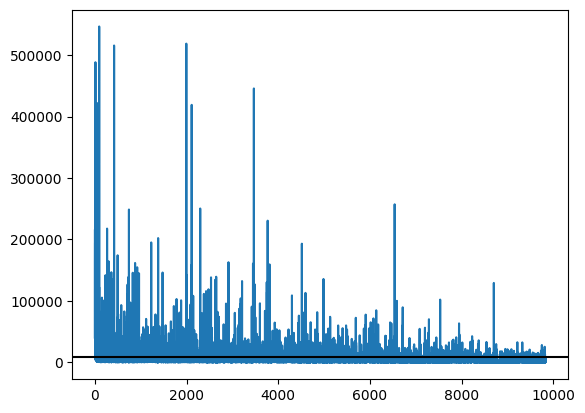

In [38]:
# plt.plot(np.cumsum(stuff['total value'].sort_values().values))
i = stuff['N. days had sales'].sort_values(ascending=False).index
# plt.plot(np.cumsum(stuff['total value'].reindex(i).values))
plt.plot(stuff['total value'].reindex(i).values)
plt.axhline(stuff['total value'].mean(), color='black')

In [39]:
stuff['total value'].max(), stuff['total value'].min()

(np.float64(546429.5200000003), np.float64(1.33))

1: 8337
5: 3856
25: 14
50: 0
100: 0


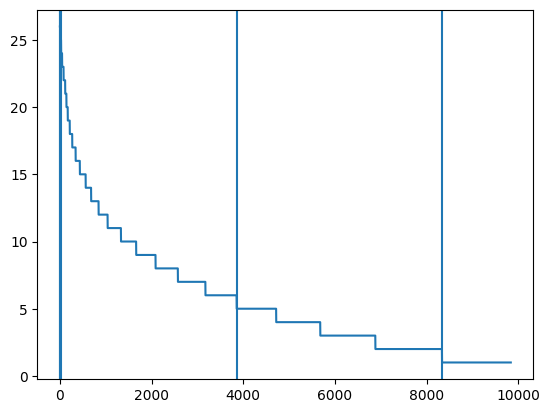

In [40]:
plt.plot(stuff['N. days had sales'].sort_values(ascending=False).values)

# for i in [1, 5] + list(range(10, 180, 10)):
for i in [1, 5, 25, 50, 100]:
    mask = stuff['N. days had sales'].sort_values(ascending=False).values > i
    j = np.argmin(mask)
    print(f"{i}: {mask.sum()}")
    plt.axvline(j)

<Axes: xlabel='week'>

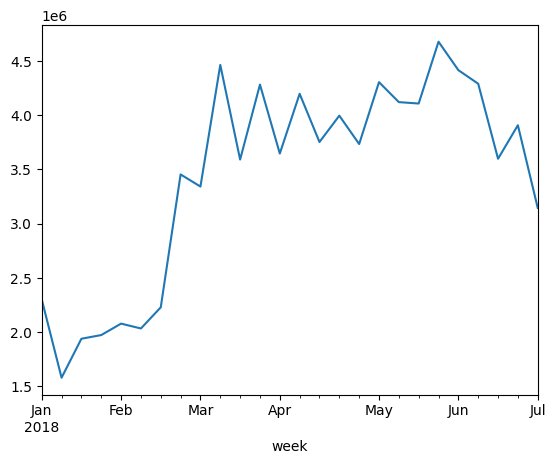

In [41]:
total_values.sum(axis=1).plot()

<Axes: xlabel='week'>

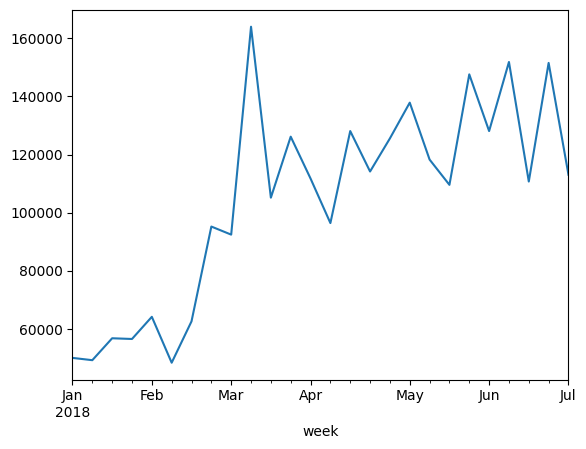

In [42]:
total_orders.sum(axis=1).plot()

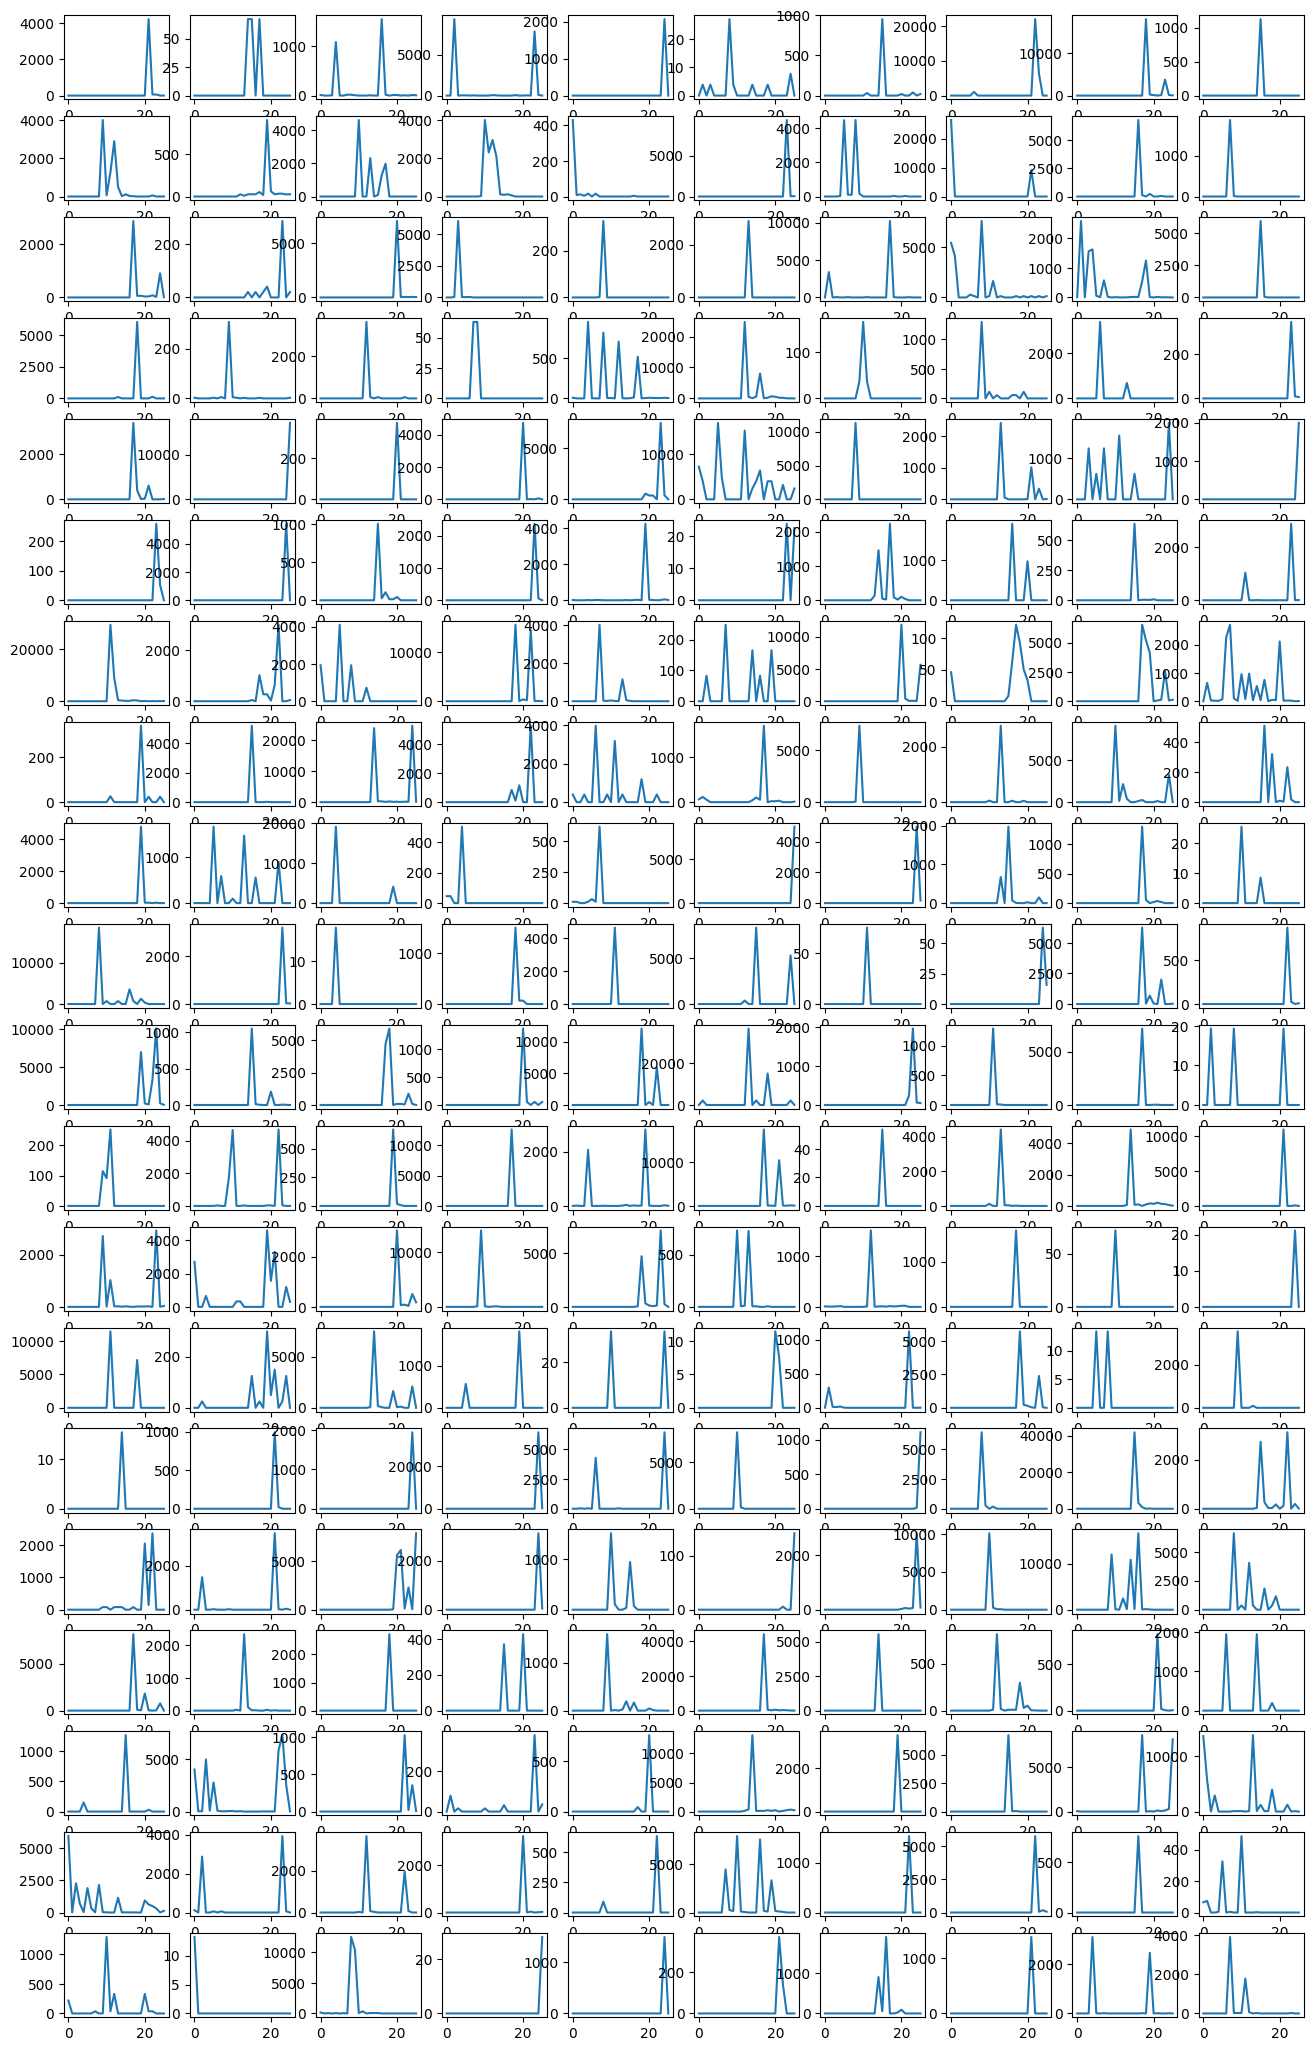

In [53]:
np.random.seed(42)
_, axs = plt.subplots(20, 10, figsize=(16,26))
axs = axs.flatten()
for a, i in zip(axs, np.random.permutation(len(total_values.columns))[:200]):
    c = total_values.columns[i]
    a.plot(total_values[c].values)

In [22]:
items = pd.read_csv("items.csv", sep="|")

In [23]:
for c in items.columns:
    if 'category' not in c:
        continue
    print(items[c].value_counts())

category1
2    2348
1    1823
8    1734
5    1679
7    1121
4     969
6     489
3     300
Name: count, dtype: int64
category2
44    1348
8     1119
32    1085
1      641
23     623
11     510
5      494
10     462
39     383
24     358
19     329
38     305
28     298
43     252
4      252
6      214
34     181
9      157
21     157
3      134
25      95
30      92
42      86
14      68
40      68
2       64
41      59
18      58
47      58
12      56
22      54
17      54
15      47
13      46
29      45
16      27
26      24
7       24
48      23
45      20
31      18
20      14
46      13
37       9
50       9
49       8
36       7
27       7
35       3
33       2
52       2
51       1
Name: count, dtype: int64
category3
2    2400
1    1823
8    1735
4    1680
6    1018
7     957
3     646
5     204
Name: count, dtype: int64


In [54]:
def plot_merged(items, orders, cat='category3', return_seq=False):
    merged = pd.merge(orders, items, how='inner')
    total_orders_c3 = merged.groupby([merged['time'].dt.date, merged[cat]])['order'].sum().unstack(1)
    d, m = divmod(total_orders_c3.columns.__len__(), 4)
    _, axs = plt.subplots(d + (m != 0), 4, figsize=(17,8))
    axs = axs.flatten()
    for a, c in zip(axs, total_orders_c3.columns):
        a.plot(total_orders_c3[c].values)
    if return_seq:
        return total_orders_c3

In [55]:
seq = plot_merged(items, orders, 'category1', True)

NameError: name 'items' is not defined

In [56]:
plot_merged(items, orders, cat='category2')

NameError: name 'items' is not defined

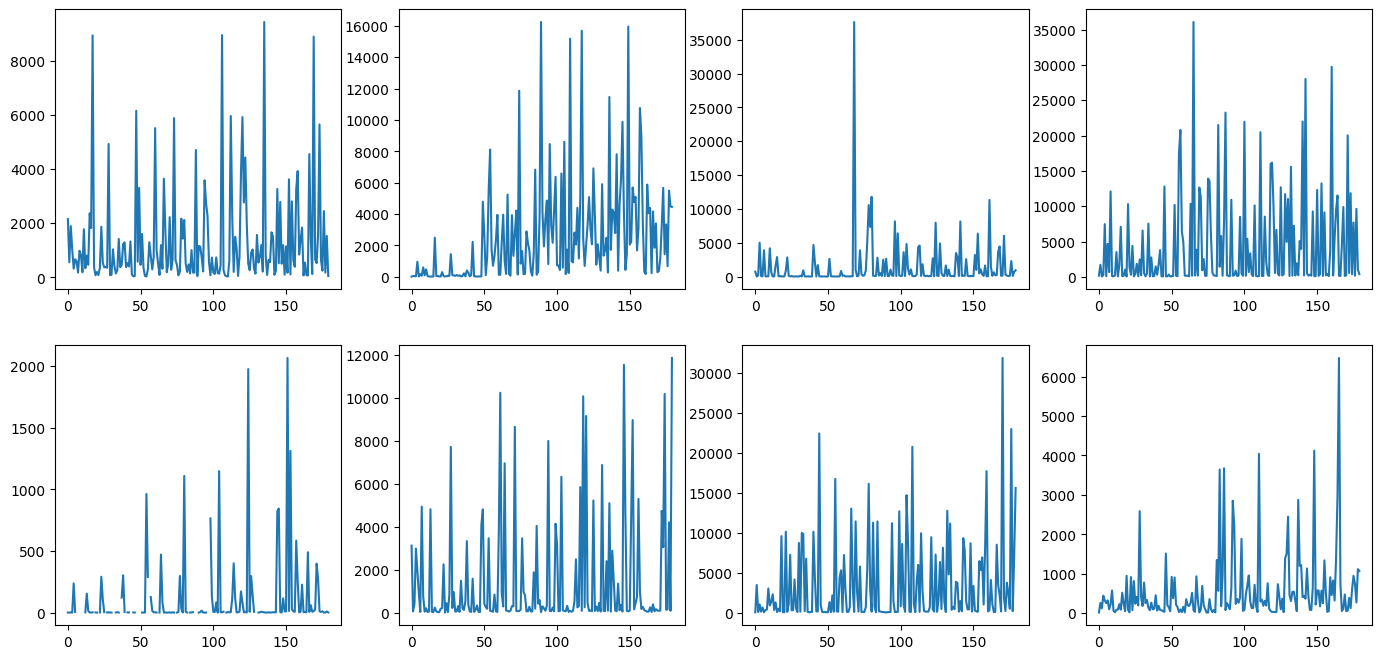

In [27]:
plot_merged(items, orders, 'category3')

# BASIC MODEL

In [28]:
from statsmodels.tsa.arima.model import ARIMA

In [29]:
train, test = seq[1].ffill().diff().dropna()[:-14], seq[1].ffill().diff()[-14:]
np.isnan(train).sum(), np.isnan(test).sum(), len(train), len(test)

(np.int64(0), np.int64(0), 165, 14)

In [30]:
model = ARIMA(train, order=(1, 0, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=7)

c:\Users\dviva\.virtualenvs\case-automated-inventory-management-execut-tVQubp4F\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\dviva\.virtualenvs\case-automated-inventory-management-execut-tVQubp4F\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\dviva\.virtualenvs\case-automated-inventory-management-execut-tVQubp4F\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [31]:
forecast = model_fit.forecast(steps=14)

<Axes: >

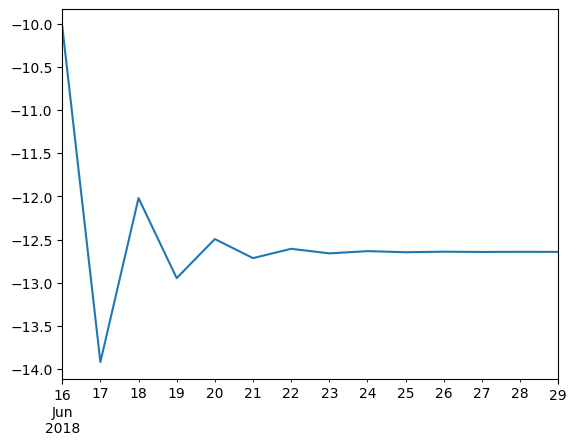

In [32]:
forecast.plot()